|  |  |
| - | - |
| ![Los Angeles skyline](la_skyline.jpg) | Los Angeles, California. The City of Angels. Tinseltown. The Entertainment Capital of the World! As with any highly populated city, it isn't always glamorous and there can be a large volume of crime. You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas. | 

## The Data

They have provided you with a single dataset (crimes.csv) to use. A summary and preview are provided below. It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

| Column     | Description              | Column     | Description              |
|------------|--------------------------|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. | `'Crm Cd Desc'` | Indicates the crime committed. | `'Vict Age'` | Victim's age in years. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. | `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. | `'Vict Descent'` | Victim's descent: A-Z |
| `'TIME OCC'` | In 24-hour military time. | `'Weapon Desc'` | Description of the weapon used (if applicable). | 
| `'Status Desc'` | Crime status. | `'LOCATION'` | Street address of the crime. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions. |


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


### Which hour has the highest frequency of crimes? 
_(Store as an integer variable called peak_crime_hour)_

In [53]:
# convert the occured time into a 24-hour integer - 'the hour'
crimes['the_hour'] = crimes['TIME OCC'].astype(int) // 100

# check the approach works
crimes[['TIME OCC', 'the_hour', 'Crm Cd Desc']].head(3)

,TIME OCC,the_hour,Crm Cd Desc
0,1110,11,THEFT OF IDENTITY
1,1620,16,THEFT OF IDENTITY
2,1200,12,THEFT OF IDENTITY


In [54]:
# sort occurences by the hour, 
peak_crime_hour = crimes['the_hour'].value_counts().idxmax()
peak_crime_hour

12

I was initially surprised, assuming that the highest frequency would be at night. Then realised that crime statistics probably suffer from survivorship bias, as more crime at night is probably 'successful' and thus unreported with no original occurrence time.

---
### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
_(Save as a string variable called peak_night_crime_location)_

I knew I could utilise boolean masking but could not rely on '&' because I'm working with time of day. In this instance I can use OR because I would be including 10pm to midnight, midnight to but not including 4am.

In [55]:
# filter all crimes occuring between 10pm and 3:59am
night_crime_mask = np.logical_or(crimes['the_hour'] >= 22, crimes['the_hour'] < 4)
night_crime = crimes[night_crime_mask]
night_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,the_hour
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0


In [56]:
peak_night_crime_location = night_crime['AREA NAME'].value_counts().idxmax()
peak_night_crime_location

'Central'

### Identify the number of crimes committed against victims of different age groups. 
_(Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.)_

In [57]:
# going to use the pandas cut function I just learned
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes['age_group'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=True)
victim_ages = crimes['age_group'].value_counts().sort_index()

victim_ages

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: age_group, dtype: int64

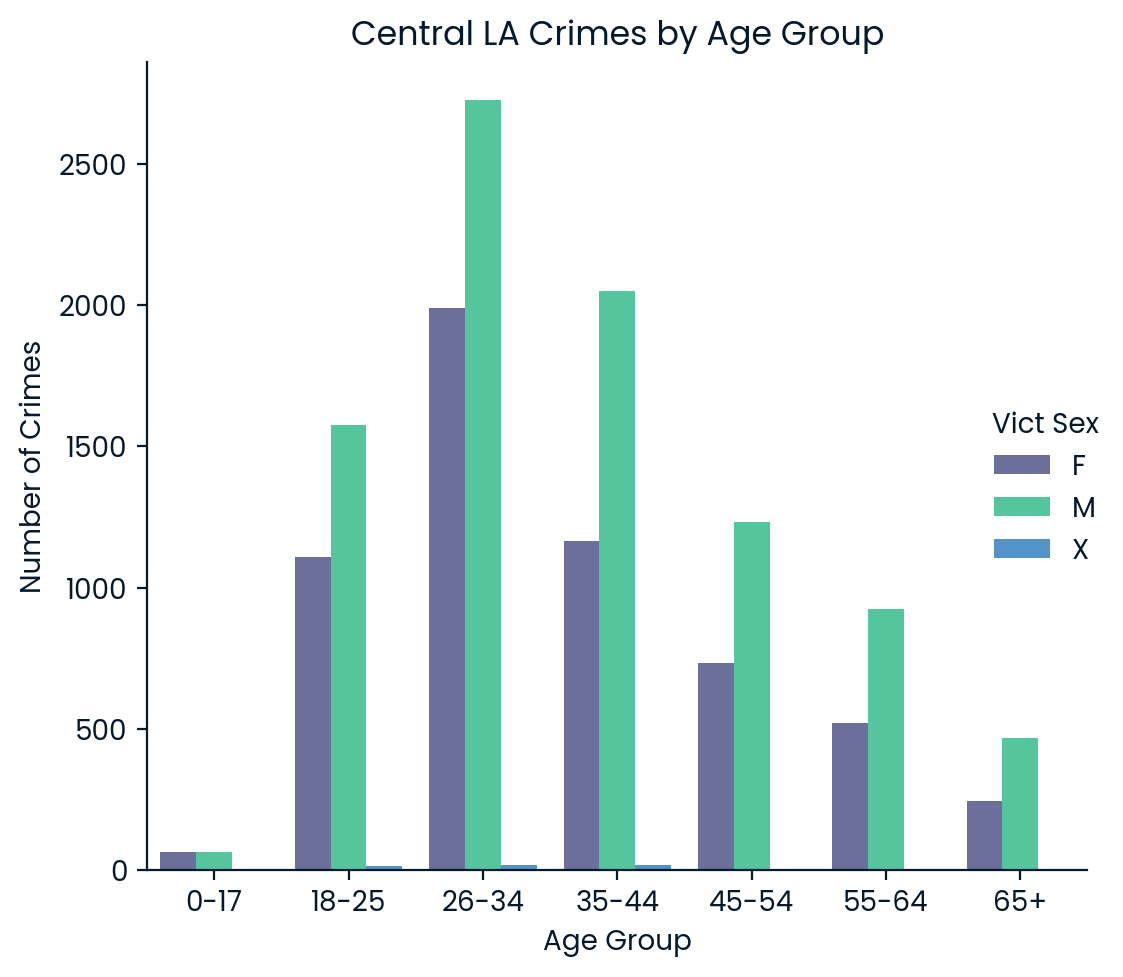

In [69]:
# removing error in gender dataset
crimes['Vict Sex'] = crimes['Vict Sex'].replace('H', np.nan)

# creating a dataframe for visualisation
central_crimes = crimes[crimes['AREA NAME'] == 'Central'][['age_group','Vict Sex']]

# plotting the above table, adding gender as a semantic variable - hue
sns.catplot(data=central_crimes,
            x='age_group',
            kind='count',
            hue='Vict Sex'
           )

plt.title("Central LA Crimes by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")
plt.tight_layout()